# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 28th, 2021 at 23:59. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: BUKAYJ.)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library to generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

In [2]:
sns.set()

np.random.seed(42)

In [3]:
def create_BA_graph(num_nodes):

  G = nx.Graph([(0, 1)])


  for i in range(2, num_nodes):
    possible_connections = np.array(G.edges()).flatten()
    connect_to = np.random.choice(np.array(G.edges()).flatten())

    G.add_edge(i, connect_to)

  return G


##  Barabasi-Albert model with 100 nodes

A function is made so it gets the number of nodes are wanted in the graph. Then it is plotted. Is easy to see that it has a couple of nodes with a lot of links, while most of the nodes only have one or two. One important feature of this type of graphs is that they are always connected.

In [4]:
G = create_BA_graph(100)  

print("Number of nodes: {}".format(len(G.nodes())))
print("Number of links: {}".format(len(G.edges())))

Number of nodes: 100
Number of links: 99


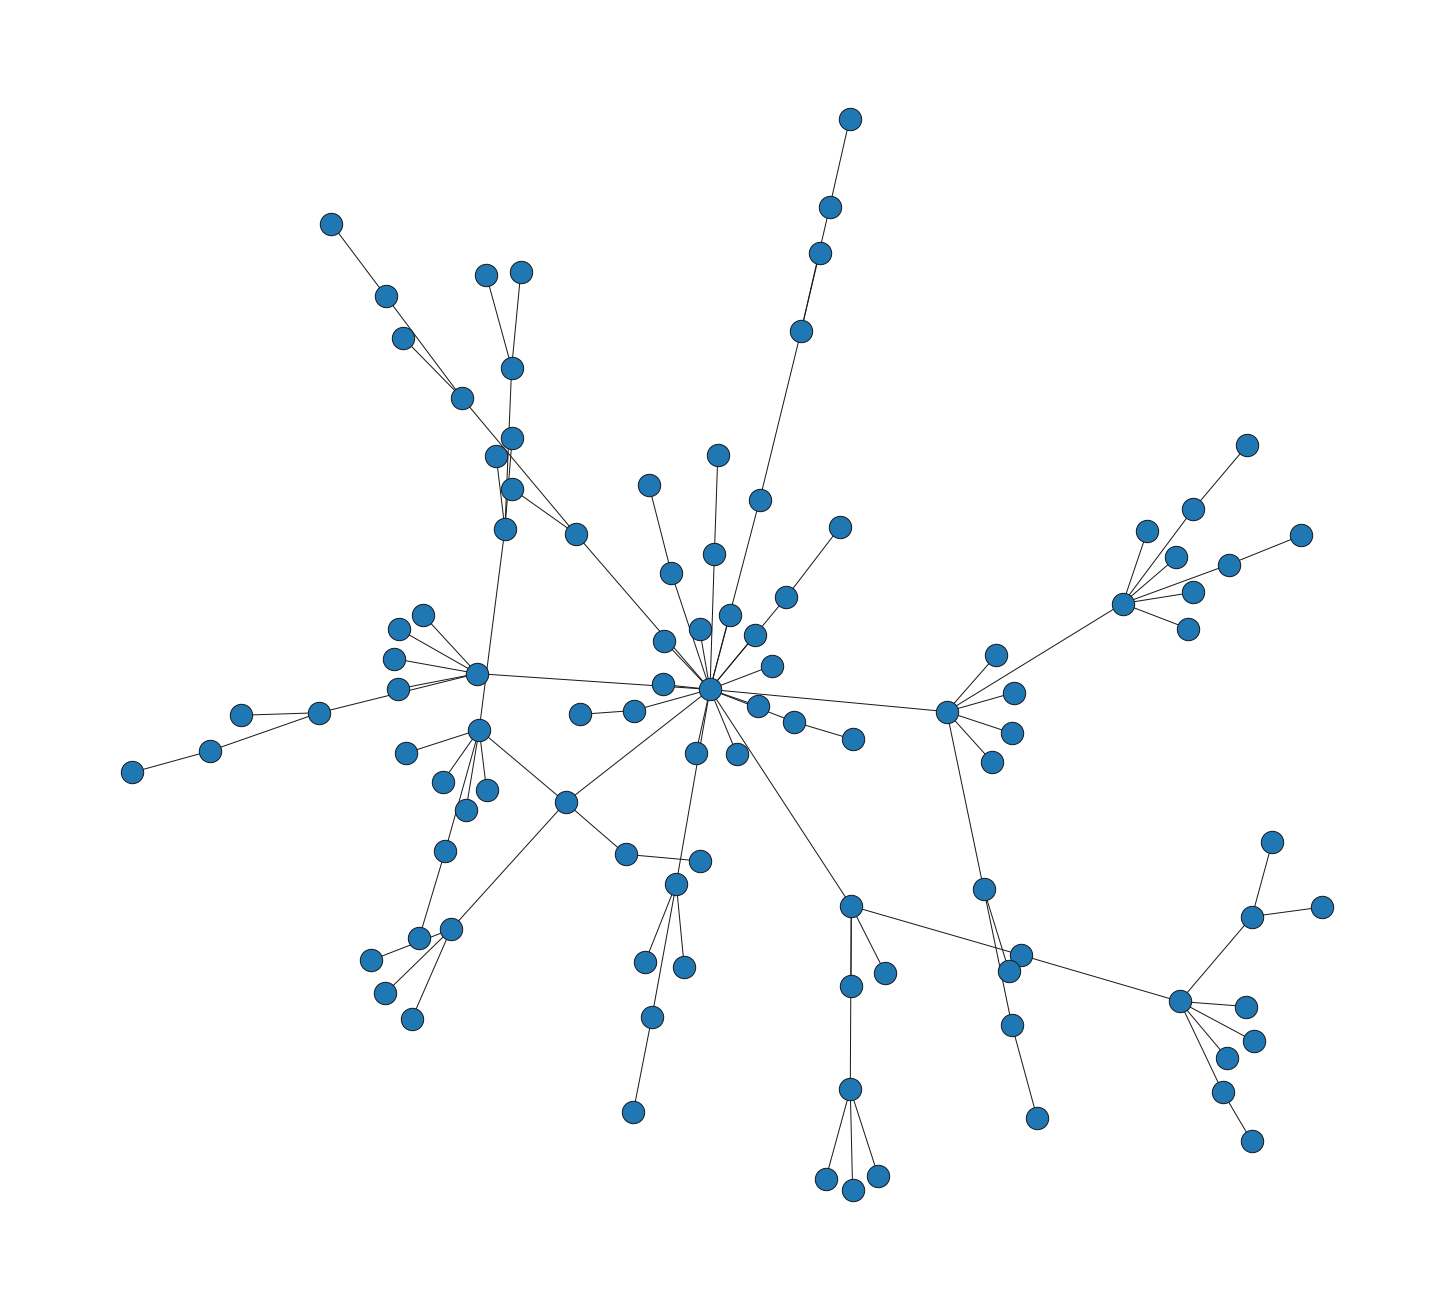

In [5]:
plt.figure(figsize=(20, 18))

nx.draw(G, node_size=500, width=1, edgecolors="k")
plt.show()

##  Barabasi-Albert model with 5000 nodes

Now we use the same function as before, but with 5000. Now is much more difficult to visualize and understand what is happening, but the plots shown after help a bit with the interpretation. Just as before, there are a couple of nodes with a lot of links, while the majority of nodes only have 1 or 2 links.

In [6]:
G = create_BA_graph(5000)  

print("Number of nodes: {}".format(len(G.nodes())))
print("Number of links: {}".format(len(G.edges())))

Number of nodes: 5000
Number of links: 4999


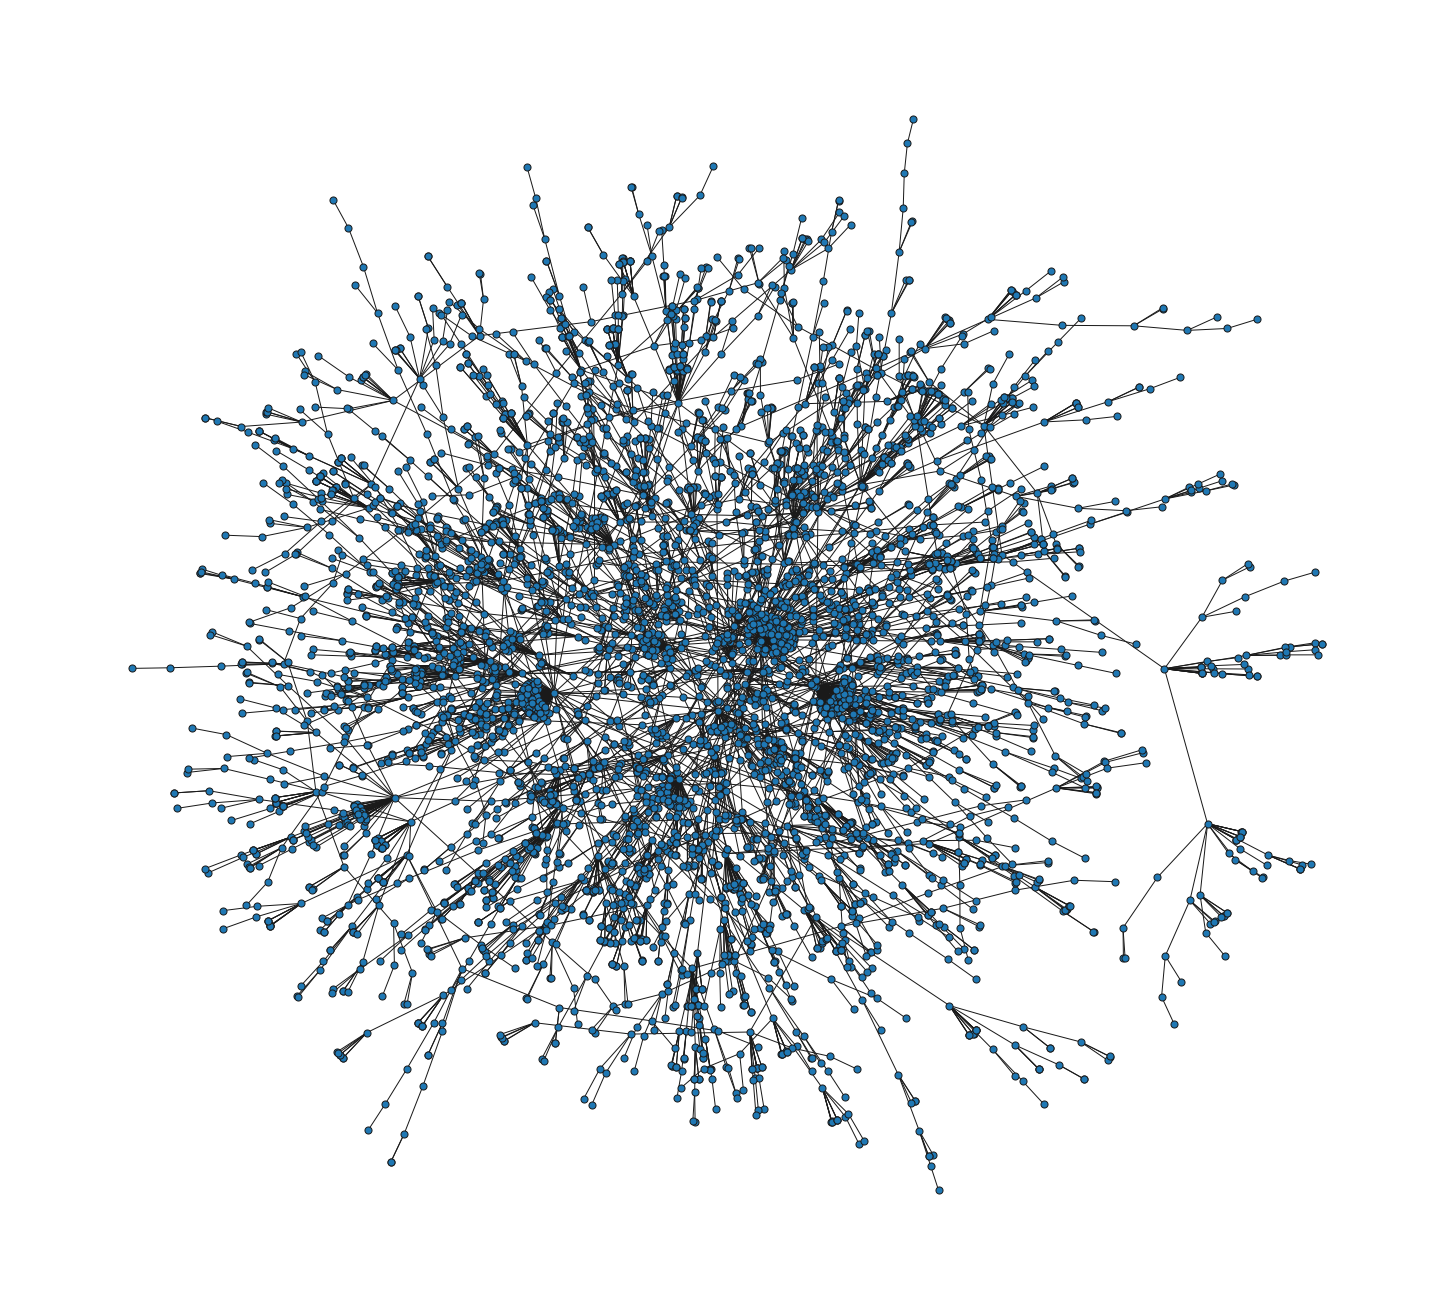

In [7]:
plt.figure(figsize=(20, 18))

nx.draw(G, node_size=50, width=1, edgecolors="k")
plt.show()

In [8]:
degree_array = np.array(G.degree)[:, 1]

print("Maximun degree: {} \t Minimun degree: {}".format(np.max(degree_array), np.min(degree_array)))

Maximun degree: 155 	 Minimun degree: 1


In [9]:
hist, bins = np.histogram(degree_array, bins=75)

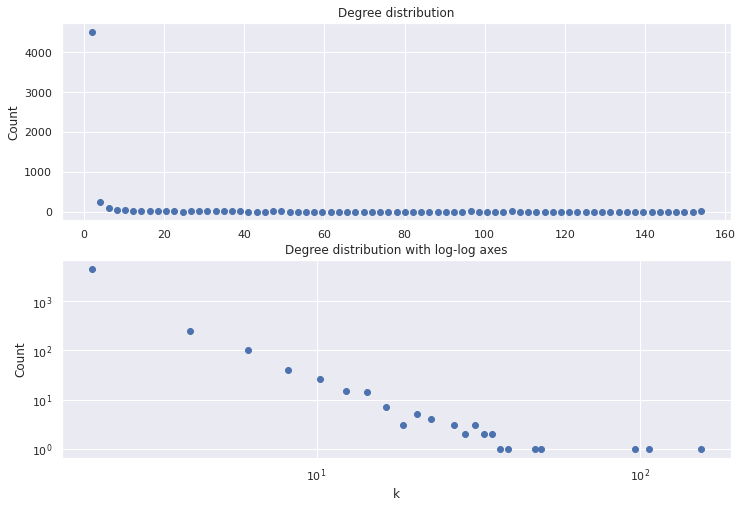

In [10]:
ticks = (bins[:-1] + bins[1:])/2

fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

axarr[0].scatter(ticks, hist)
axarr[0].set_ylabel("Count")
axarr[0].set_title("Degree distribution")

axarr[1].set_yscale('log')
axarr[1].set_xscale('log')
axarr[1].scatter(ticks, hist)
axarr[1].set_ylabel("Count")
axarr[1].set_xlabel("k")
axarr[1].set_title("Degree distribution with log-log axes")


plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

For this exercise, a function that calculates the average degree of the neighbors of a node is made. As can be seen, for a 100 tries, the paradox is broken less than 1% of the times.

In [11]:
def calculate_avg_degree_neighbors(graph, node):
  avg_degree = 0
  for neighbor in graph.neighbors(node):
    avg_degree += len(list(graph.neighbors(neighbor))) / len(list(graph.neighbors(node)))
    
  return round(avg_degree, 2)

In [12]:
rng_node = np.random.choice(G.nodes)
rng_degree = G.degree(rng_node)

print("Random node degree is {} and its neighbors average degree is {}"\
      .format(rng_degree, calculate_avg_degree_neighbors(G, rng_degree)))

Random node degree is 1 and its neighbors average degree is 4.31


In [13]:
tries = 1000
failed_paradox_counter = 0

for i in range(tries):
  rng_node = np.random.choice(G.nodes)
  rng_degree = G.degree(rng_node)
  neighbors_avg = calculate_avg_degree_neighbors(G, rng_degree)
  
  if neighbors_avg < rng_degree:
    failed_paradox_counter += 1

print("The paradox is true {}% of the times ({} out of {})"\
     .format(1-(failed_paradox_counter/tries),
            (tries - failed_paradox_counter),
            tries))

The paradox is true 0.966% of the times (966 out of 1000)


## Growth mechanism without the preferential attachment

In [14]:
def create_grow_graph_no_pref(num_nodes):

  G = nx.Graph([(0, 1)])

  for i in range(2, num_nodes):
    possible_connections = np.array(G.nodes())
    connect_to = np.random.choice(np.array(G.edges()).flatten())

    G.add_edge(i, connect_to)

  return G

In [15]:
G = create_grow_graph_no_pref(5000)
G_er = nx.erdos_renyi_graph(5000, 1/5000)

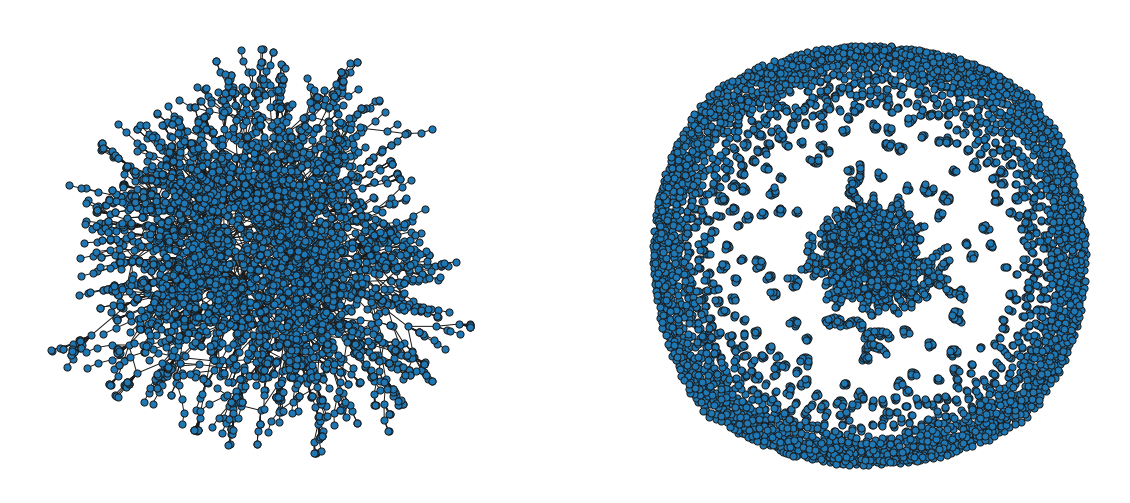

In [16]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 9))

nx.draw(G, node_size=50, width=1, edgecolors="k", ax=axarr[0])
nx.draw(G_er, node_size=50, width=1, edgecolors="k", ax=axarr[1])
plt.show()

The first main different that can be appreciated from the graph drawing is that the *Erdos-Reny* graph may not be always connected, while the one made with the growth mechanism is always connected. That's because the in the graph created with the growth mechanism, eac node is at least connected to another.

In [17]:
degree_array_g = np.array(G.degree)[:, 1]
degree_array_g_er = np.array(G_er.degree)[:, 1]
hist_g, bins_g = np.histogram(degree_array_g, bins=np.unique(degree_array_g))
hist_g_er, bins_g_er = np.histogram(degree_array_g_er, bins=np.unique(degree_array_g_er))

In [18]:
np.histogram(degree_array_g_er, bins=np.unique(degree_array_g_er))

(array([1810, 1875,  904,  325,   75,   11]), array([0, 1, 2, 3, 4, 5, 6]))

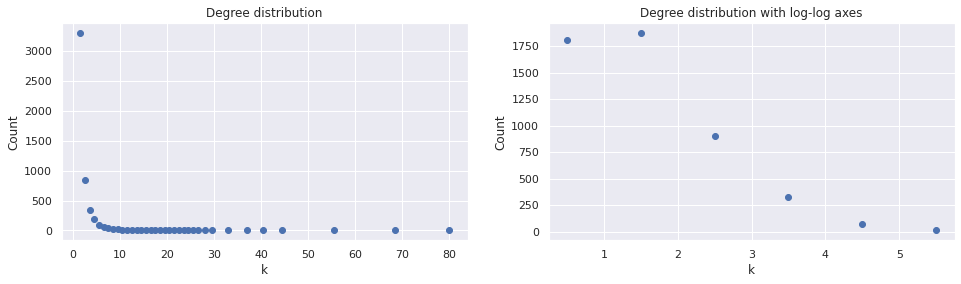

In [19]:
ticks_g = (bins_g[:-1] + bins_g[1:])/2
ticks_g_er = (bins_g_er[:-1] + bins_g_er[1:])/2

fig, axarr = plt.subplots(1, 2, figsize=(16, 4))

axarr[0].scatter(ticks_g, hist_g)
axarr[0].set_ylabel("Count")
axarr[0].set_xlabel("k")
axarr[0].set_title("Degree distribution")

axarr[1].scatter(ticks_g_er, hist_g_er)
axarr[1].set_ylabel("Count")
axarr[1].set_xlabel("k")
axarr[1].set_title("Degree distribution with log-log axes")


plt.show()

**Growth mechanism graph**

In [20]:
print("Maximun degree: {} \t Minimun degree: {}".format(np.max(degree_array_g), np.min(degree_array_g)))

Maximun degree: 88 	 Minimun degree: 1


**Erdos-Renyi graph**

In [21]:
print("Maximun degree: {} \t Minimun degree: {}".format(np.max(degree_array_g_er), np.min(degree_array_g_er)))

Maximun degree: 6 	 Minimun degree: 0


As can be seen with the graphs and the minimun and maximun degree of each graph, the *Erdos-Renyi* graph has a range of degree much smaller, and that means that more nodes are connected to a few, instead of a couple nodes having a lot of neighbors.